### <center> Dev Bharatbhai Patel(8938546) </center>
### <center>Lab-3</center>

### <font color='blue'> 1. Frame the problem and look at the big picture.</font>
- #### *Framing the problem*:
    - Identifing how BMI is related to diabetes progression using the diabetes dataset.
    <br>
    <br>

- #### *Big Picture*:
    - The healthcare industry may benefit much from this analysis. The main point is we are investigating the model parameters and performance of univariate linear regression to investigate this relationship. So, Our ultimate goal is to use data to enhance diabetes care.

### <font color='blue'> 2. Get the data.</font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
import plotly.express as px


from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,accuracy_score

from sklearn import datasets

In [2]:
# Loading the Diabetes datasets from Scikit-Learn
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

print("Diabetes X \n", diabetes_X ,'\n')
print("Diabetes Y \n", diabetes_y)

Diabetes X 
 [[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]] 

Diabetes Y 
 [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90

### <font color='blue'> 3. Explore the data to gain insights.</font>
- As per [SciKit-Learn's](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) description of the diabetes dataset there are total 10 baseline(age, sex, body mass index, average blood pressure, and six blood serum measurements) which were obtained for each of 'n=442' diabetes patients with a quantitative measure of disease progression one year after baseline.

In [3]:
# Converting the RawData to Pandas Data Frame.
X_data=pd.DataFrame(diabetes_X,columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])

# Adding a Column 11 for Diabities Progression
X_data['Disease Progression']=pd.DataFrame(diabetes_y)

X_data


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Disease Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


- Exploring coorelation between them using **2D histogram**.

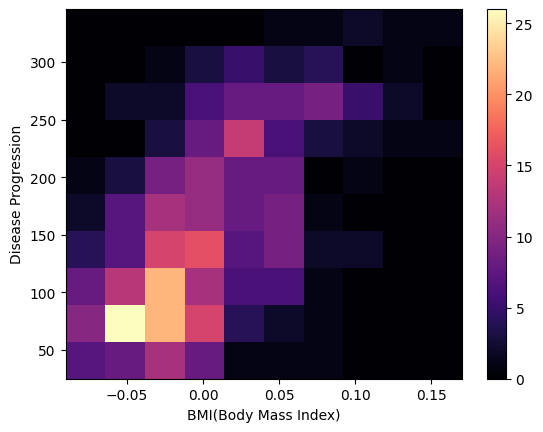

In [59]:
plt.hist2d(X_data['bmi'], X_data['Disease Progression'], bins=(10, 10), cmap='magma')
plt.colorbar()
plt.xlabel("BMI(Body Mass Index)")
plt.ylabel("Disease Progression")

plt.show()

- Now, using **sns.relplot** to explore the same data. 

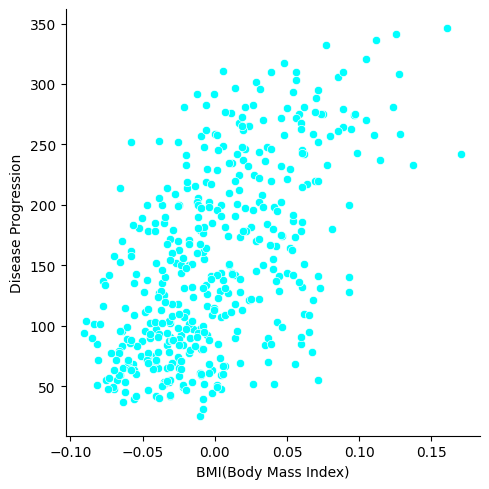

In [54]:
sns.relplot(x=X_data['bmi'], y=X_data['Disease Progression'], kind='scatter', color='aqua')
plt.xlabel("BMI(Body Mass Index)")
plt.ylabel("Disease Progression")

plt.show()

- **sns.lineplot** is also good to coorelate between BMI and Disease Progression.

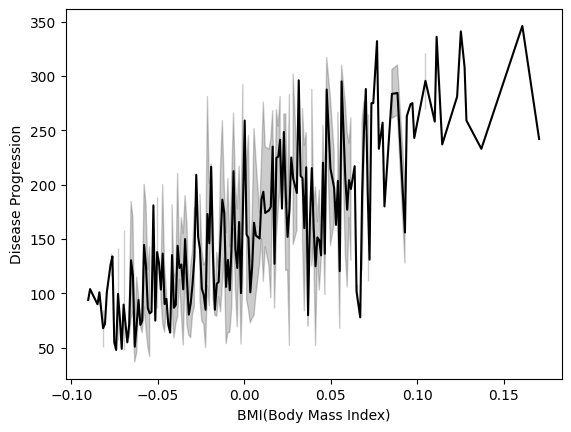

In [53]:
sns.lineplot(x=X_data['bmi'], y=X_data['Disease Progression'], color='black')
plt.xlabel("BMI(Body Mass Index)")
plt.ylabel("Disease Progression")

plt.show()

### <font color='blue'> 6. Fine-tune your models and combine them into a great solution.</font>
- Splitting the data into training and testing sets

In [30]:
x = np.array(X_data["bmi"]).reshape(-1,1)
y = np.array(X_data["Disease Progression"])

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print("X_train shape:", X_test.shape)

X_train shape: (89, 1)


- Once the splitting is done, will train the **linear regression** model

In [32]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

- Making prediction of traget value using test sets

In [33]:
Y_test_pred=model.predict(X_test)
Y_train_pred=model.predict(X_train)

- The coefficients and Intercept of the training model

In [35]:
print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)

Coefficients:  [977.74040067]
Intercept:  151.66780594915235


- Calculating the mean square error.

In [60]:
print('Mean squared error of Tested Data: %.2f' % metrics.mean_squared_error(Y_test, Y_test_pred))
print('Mean squared error of Trained Data: %.2f' % metrics.mean_squared_error(Y_train, Y_train_pred))

Mean squared error of Tested Data: 3989.83
Mean squared error of Trained Data: 3867.94


### <font color='blue'> 7. Present your solution.</font>
- Presenting the solution of the model.

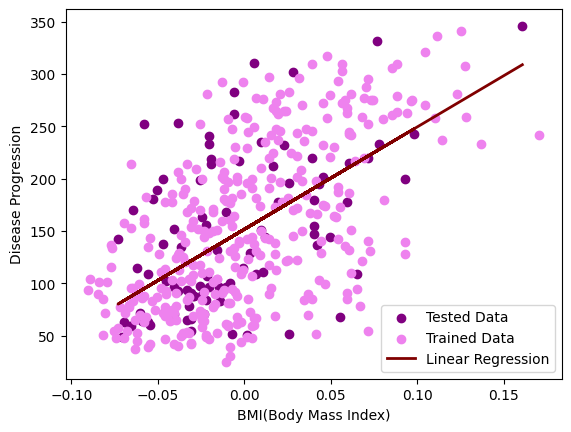

In [52]:
plt.scatter(X_test, Y_test,  color='purple', label = "Tested Data")
plt.scatter(X_train, Y_train,  color='violet', label = "Trained Data")
plt.plot(X_test, Y_test_pred, color='maroon', linewidth=2, label = "Linear Regression")
plt.xlabel("BMI(Body Mass Index)")
plt.ylabel("Disease Progression")
plt.legend()
plt.show()

#### Conclusion of the Model
- From the above linear regression line. It is easy to identify that there is some coorelation between BMI and Disease Progression, but the accuracy of our model is uneven as the data is spreaded with the mean square root of the tested data **[3989.83]** and trained data **[3867.94]**